## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9644070	total: 58.6ms	remaining: 58.6s
1:	learn: 0.9442255	total: 59.6ms	remaining: 29.7s
2:	learn: 0.9240354	total: 60.7ms	remaining: 20.2s
3:	learn: 0.9072933	total: 61.9ms	remaining: 15.4s
4:	learn: 0.8889636	total: 62.8ms	remaining: 12.5s
5:	learn: 0.8747660	total: 63.9ms	remaining: 10.6s
6:	learn: 0.8584676	total: 64.8ms	remaining: 9.19s
7:	learn: 0.8429741	total: 65.8ms	remaining: 8.15s
8:	learn: 0.8280620	total: 66.7ms	remaining: 7.34s
9:	learn: 0.8130690	total: 67.6ms	remaining: 6.69s
10:	learn: 0.7975148	total: 68.5ms	remaining: 6.16s
11:	learn: 0.7823251	total: 69.5ms	remaining: 5.72s
12:	learn: 0.7675039	total: 70.3ms	remaining: 5.34s
13:	learn: 0.7534686	total: 71.2ms	remaining: 5.01s
14:	learn: 0.7392670	total: 72.1ms	remaining: 4.74s
15:	learn: 0.7256084	total: 73ms	remaining: 4.49s
16:	learn: 0.7123141	total: 73.9ms	remaining: 4.27s
17:	learn: 0.7016125	total: 74.8ms	remaining: 4.08s
18:	learn: 0.6896603	total: 75.7ms	remaining: 

57:	learn: 0.4150819	total: 107ms	remaining: 1.74s
58:	learn: 0.4112043	total: 108ms	remaining: 1.72s
59:	learn: 0.4074107	total: 109ms	remaining: 1.7s
60:	learn: 0.4042240	total: 110ms	remaining: 1.69s
61:	learn: 0.4002493	total: 110ms	remaining: 1.67s
62:	learn: 0.3969345	total: 111ms	remaining: 1.65s
63:	learn: 0.3940851	total: 112ms	remaining: 1.64s
64:	learn: 0.3905581	total: 113ms	remaining: 1.63s
65:	learn: 0.3875263	total: 114ms	remaining: 1.61s
66:	learn: 0.3844361	total: 115ms	remaining: 1.6s
67:	learn: 0.3812789	total: 116ms	remaining: 1.58s
68:	learn: 0.3787735	total: 116ms	remaining: 1.57s
69:	learn: 0.3759060	total: 117ms	remaining: 1.56s
70:	learn: 0.3725057	total: 118ms	remaining: 1.54s
71:	learn: 0.3697115	total: 119ms	remaining: 1.53s
72:	learn: 0.3668896	total: 120ms	remaining: 1.52s
73:	learn: 0.3643506	total: 120ms	remaining: 1.5s
74:	learn: 0.3608716	total: 121ms	remaining: 1.5s
75:	learn: 0.3579178	total: 122ms	remaining: 1.48s
76:	learn: 0.3545166	total: 123ms	r

158:	learn: 0.2546435	total: 192ms	remaining: 1.01s
159:	learn: 0.2542026	total: 193ms	remaining: 1.01s
160:	learn: 0.2534733	total: 194ms	remaining: 1.01s
161:	learn: 0.2527791	total: 194ms	remaining: 1s
162:	learn: 0.2522545	total: 195ms	remaining: 1s
163:	learn: 0.2517790	total: 197ms	remaining: 1s
164:	learn: 0.2510744	total: 197ms	remaining: 999ms
165:	learn: 0.2504162	total: 198ms	remaining: 996ms
166:	learn: 0.2496696	total: 199ms	remaining: 993ms
167:	learn: 0.2485922	total: 200ms	remaining: 990ms
168:	learn: 0.2481580	total: 201ms	remaining: 986ms
169:	learn: 0.2474340	total: 202ms	remaining: 984ms
170:	learn: 0.2469311	total: 202ms	remaining: 981ms
171:	learn: 0.2462878	total: 203ms	remaining: 978ms
172:	learn: 0.2456339	total: 204ms	remaining: 976ms
173:	learn: 0.2449229	total: 205ms	remaining: 972ms
174:	learn: 0.2443054	total: 206ms	remaining: 969ms
175:	learn: 0.2437577	total: 207ms	remaining: 967ms
176:	learn: 0.2432768	total: 207ms	remaining: 964ms
177:	learn: 0.2426380

286:	learn: 0.1952501	total: 297ms	remaining: 739ms
287:	learn: 0.1951050	total: 299ms	remaining: 738ms
288:	learn: 0.1950431	total: 299ms	remaining: 736ms
289:	learn: 0.1943564	total: 300ms	remaining: 735ms
290:	learn: 0.1939833	total: 301ms	remaining: 734ms
291:	learn: 0.1934505	total: 302ms	remaining: 732ms
292:	learn: 0.1928899	total: 303ms	remaining: 731ms
293:	learn: 0.1926520	total: 304ms	remaining: 730ms
294:	learn: 0.1925941	total: 305ms	remaining: 728ms
295:	learn: 0.1921099	total: 306ms	remaining: 727ms
296:	learn: 0.1918810	total: 306ms	remaining: 725ms
297:	learn: 0.1912412	total: 307ms	remaining: 723ms
298:	learn: 0.1906900	total: 309ms	remaining: 724ms
299:	learn: 0.1902202	total: 309ms	remaining: 722ms
300:	learn: 0.1898300	total: 310ms	remaining: 720ms
301:	learn: 0.1894066	total: 311ms	remaining: 719ms
302:	learn: 0.1892372	total: 312ms	remaining: 718ms
303:	learn: 0.1888495	total: 313ms	remaining: 716ms
304:	learn: 0.1885832	total: 313ms	remaining: 714ms
305:	learn: 

385:	learn: 0.1598438	total: 382ms	remaining: 608ms
386:	learn: 0.1595735	total: 383ms	remaining: 607ms
387:	learn: 0.1590989	total: 384ms	remaining: 606ms
388:	learn: 0.1588182	total: 385ms	remaining: 605ms
389:	learn: 0.1583901	total: 386ms	remaining: 604ms
390:	learn: 0.1581266	total: 387ms	remaining: 603ms
391:	learn: 0.1578408	total: 388ms	remaining: 601ms
392:	learn: 0.1575531	total: 389ms	remaining: 600ms
393:	learn: 0.1571988	total: 389ms	remaining: 599ms
394:	learn: 0.1567779	total: 390ms	remaining: 598ms
395:	learn: 0.1564337	total: 391ms	remaining: 596ms
396:	learn: 0.1560672	total: 392ms	remaining: 595ms
397:	learn: 0.1558735	total: 393ms	remaining: 594ms
398:	learn: 0.1555483	total: 394ms	remaining: 593ms
399:	learn: 0.1551759	total: 394ms	remaining: 592ms
400:	learn: 0.1549881	total: 395ms	remaining: 590ms
401:	learn: 0.1548303	total: 396ms	remaining: 589ms
402:	learn: 0.1544639	total: 397ms	remaining: 588ms
403:	learn: 0.1540788	total: 398ms	remaining: 587ms
404:	learn: 

510:	learn: 0.1234458	total: 487ms	remaining: 466ms
511:	learn: 0.1233220	total: 488ms	remaining: 466ms
512:	learn: 0.1231051	total: 489ms	remaining: 464ms
513:	learn: 0.1229020	total: 490ms	remaining: 464ms
514:	learn: 0.1225282	total: 491ms	remaining: 463ms
515:	learn: 0.1223062	total: 492ms	remaining: 462ms
516:	learn: 0.1219983	total: 493ms	remaining: 461ms
517:	learn: 0.1217789	total: 494ms	remaining: 460ms
518:	learn: 0.1215683	total: 495ms	remaining: 459ms
519:	learn: 0.1214015	total: 496ms	remaining: 458ms
520:	learn: 0.1212099	total: 497ms	remaining: 457ms
521:	learn: 0.1208767	total: 498ms	remaining: 456ms
522:	learn: 0.1206712	total: 499ms	remaining: 455ms
523:	learn: 0.1204025	total: 500ms	remaining: 454ms
524:	learn: 0.1202420	total: 501ms	remaining: 453ms
525:	learn: 0.1199710	total: 502ms	remaining: 452ms
526:	learn: 0.1196733	total: 503ms	remaining: 451ms
527:	learn: 0.1193540	total: 504ms	remaining: 451ms
528:	learn: 0.1191141	total: 505ms	remaining: 450ms
529:	learn: 

609:	learn: 0.1040615	total: 572ms	remaining: 366ms
610:	learn: 0.1039212	total: 573ms	remaining: 365ms
611:	learn: 0.1037546	total: 574ms	remaining: 364ms
612:	learn: 0.1036630	total: 575ms	remaining: 363ms
613:	learn: 0.1034948	total: 576ms	remaining: 362ms
614:	learn: 0.1033674	total: 577ms	remaining: 361ms
615:	learn: 0.1032255	total: 578ms	remaining: 360ms
616:	learn: 0.1030620	total: 579ms	remaining: 359ms
617:	learn: 0.1029498	total: 579ms	remaining: 358ms
618:	learn: 0.1027409	total: 580ms	remaining: 357ms
619:	learn: 0.1025955	total: 581ms	remaining: 356ms
620:	learn: 0.1025614	total: 582ms	remaining: 355ms
621:	learn: 0.1023485	total: 582ms	remaining: 354ms
622:	learn: 0.1021800	total: 583ms	remaining: 353ms
623:	learn: 0.1019350	total: 584ms	remaining: 352ms
624:	learn: 0.1018472	total: 585ms	remaining: 351ms
625:	learn: 0.1016164	total: 586ms	remaining: 350ms
626:	learn: 0.1013714	total: 586ms	remaining: 349ms
627:	learn: 0.1012135	total: 587ms	remaining: 348ms
628:	learn: 

736:	learn: 0.0863262	total: 677ms	remaining: 242ms
737:	learn: 0.0862089	total: 678ms	remaining: 241ms
738:	learn: 0.0860506	total: 679ms	remaining: 240ms
739:	learn: 0.0858598	total: 680ms	remaining: 239ms
740:	learn: 0.0857176	total: 681ms	remaining: 238ms
741:	learn: 0.0855721	total: 682ms	remaining: 237ms
742:	learn: 0.0854238	total: 682ms	remaining: 236ms
743:	learn: 0.0852705	total: 683ms	remaining: 235ms
744:	learn: 0.0851402	total: 684ms	remaining: 234ms
745:	learn: 0.0850042	total: 685ms	remaining: 233ms
746:	learn: 0.0848406	total: 686ms	remaining: 232ms
747:	learn: 0.0848087	total: 686ms	remaining: 231ms
748:	learn: 0.0846466	total: 687ms	remaining: 230ms
749:	learn: 0.0845104	total: 688ms	remaining: 229ms
750:	learn: 0.0842938	total: 689ms	remaining: 228ms
751:	learn: 0.0841314	total: 690ms	remaining: 227ms
752:	learn: 0.0840412	total: 691ms	remaining: 227ms
753:	learn: 0.0838399	total: 691ms	remaining: 226ms
754:	learn: 0.0836976	total: 692ms	remaining: 225ms
755:	learn: 

837:	learn: 0.0736442	total: 763ms	remaining: 147ms
838:	learn: 0.0735083	total: 764ms	remaining: 147ms
839:	learn: 0.0733453	total: 765ms	remaining: 146ms
840:	learn: 0.0732295	total: 765ms	remaining: 145ms
841:	learn: 0.0731530	total: 766ms	remaining: 144ms
842:	learn: 0.0731356	total: 767ms	remaining: 143ms
843:	learn: 0.0730216	total: 768ms	remaining: 142ms
844:	learn: 0.0729138	total: 769ms	remaining: 141ms
845:	learn: 0.0728118	total: 770ms	remaining: 140ms
846:	learn: 0.0726929	total: 771ms	remaining: 139ms
847:	learn: 0.0726025	total: 771ms	remaining: 138ms
848:	learn: 0.0724801	total: 772ms	remaining: 137ms
849:	learn: 0.0723898	total: 773ms	remaining: 136ms
850:	learn: 0.0723344	total: 774ms	remaining: 135ms
851:	learn: 0.0722911	total: 774ms	remaining: 135ms
852:	learn: 0.0722623	total: 775ms	remaining: 134ms
853:	learn: 0.0720984	total: 776ms	remaining: 133ms
854:	learn: 0.0720063	total: 777ms	remaining: 132ms
855:	learn: 0.0719134	total: 778ms	remaining: 131ms
856:	learn: 

964:	learn: 0.0615549	total: 868ms	remaining: 31.5ms
965:	learn: 0.0614311	total: 868ms	remaining: 30.6ms
966:	learn: 0.0613302	total: 869ms	remaining: 29.7ms
967:	learn: 0.0612856	total: 870ms	remaining: 28.8ms
968:	learn: 0.0612259	total: 871ms	remaining: 27.9ms
969:	learn: 0.0611609	total: 872ms	remaining: 27ms
970:	learn: 0.0610567	total: 872ms	remaining: 26.1ms
971:	learn: 0.0610317	total: 873ms	remaining: 25.2ms
972:	learn: 0.0609063	total: 874ms	remaining: 24.3ms
973:	learn: 0.0608122	total: 875ms	remaining: 23.4ms
974:	learn: 0.0607396	total: 876ms	remaining: 22.4ms
975:	learn: 0.0606654	total: 876ms	remaining: 21.5ms
976:	learn: 0.0606066	total: 877ms	remaining: 20.6ms
977:	learn: 0.0604967	total: 878ms	remaining: 19.8ms
978:	learn: 0.0604451	total: 879ms	remaining: 18.9ms
979:	learn: 0.0603898	total: 880ms	remaining: 18ms
980:	learn: 0.0603235	total: 880ms	remaining: 17.1ms
981:	learn: 0.0602860	total: 881ms	remaining: 16.2ms
982:	learn: 0.0601743	total: 882ms	remaining: 15.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

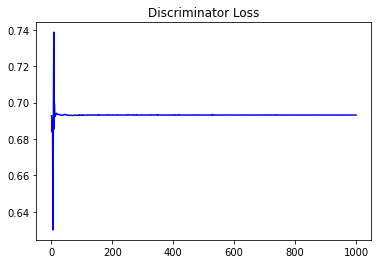

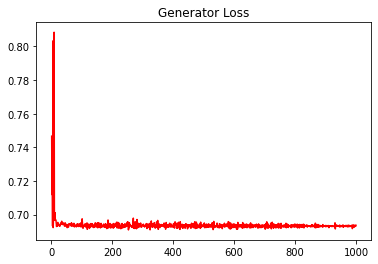

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.12003701921227074


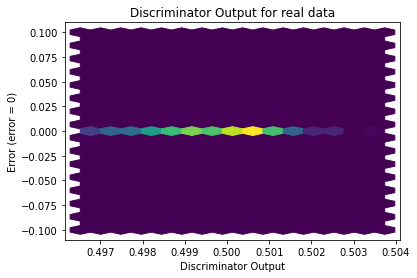

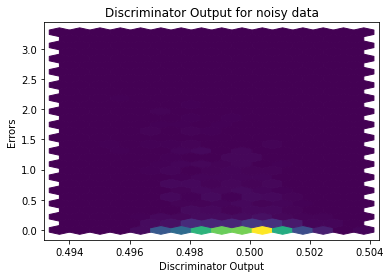

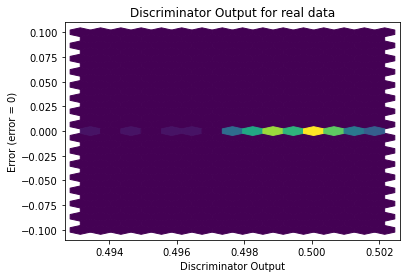

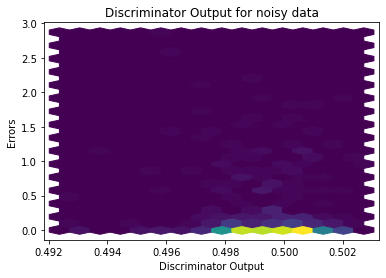

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


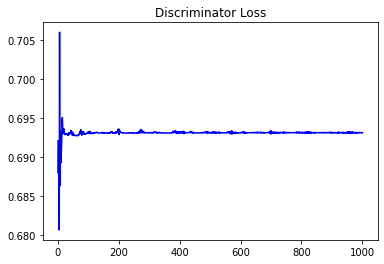

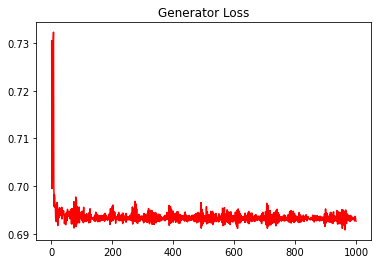

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10237932070093239


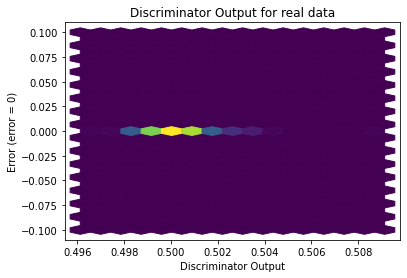

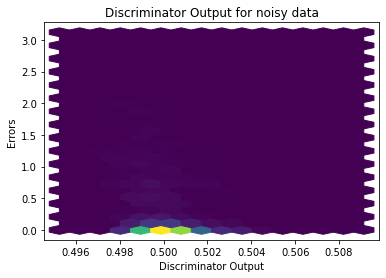

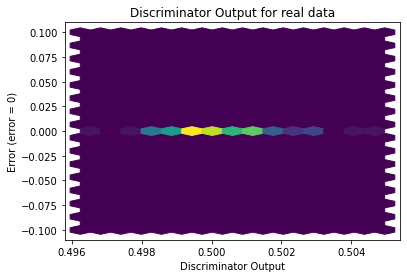

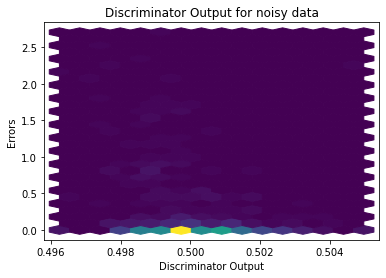

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1371]], requires_grad=True)
